In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random


from collections import OrderedDict
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [4]:

# load the dataset as a pandas dataframe
df = pd.read_csv('Data\projections_NO_OptimalCost_RCP26.csv')

# extract the fifth row as a pandas series
row_5 = df.iloc[4]

# convert the series to a dataframe with a single column
Y1 = pd.DataFrame(row_5.values, columns=['OptimalCost'])



      OptimalCost
0        0.014933
1        0.012797
2        0.016108
3        0.017831
4        0.014529
...           ...
9995     0.013727
9996     0.016050
9997     0.015805
9998     0.015962
9999     0.016805

[10000 rows x 1 columns]


In [5]:

random.seed(100000)

In [6]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp1-26.csv") 


In [7]:
X = pd.concat([X1, X2], axis=1)

In [8]:
# Extracting Feature names
feature_names = X.columns

In [10]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=10)



In [14]:
# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])



In [15]:
# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


# For SSP1-26

In [25]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [40, 50, 65, 72, 81, 90, 100, 105, 115, 120],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [20],
            "bootstrap": [True, False],
            }

In [26]:

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 115}

In [27]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [115],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [20],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 115}

In [28]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [115],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 115}

MSE for Random Forest on CV train data:  0.0000000875
MSE for Random Forest on test data:  0.0000143600


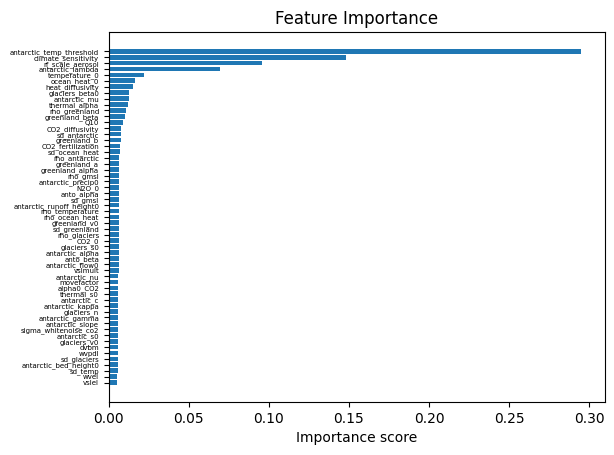

In [32]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 115, max_depth=20)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5_ssp1_26 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5_ssp1_26)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5_ssp1_26[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

# SSP2-45

In [30]:
# load the dataset as a pandas dataframe
df = pd.read_csv('Data\projections_NO_OptimalCost_RCP45.csv')

# extract the fifth row as a pandas series
row_5 = df.iloc[4]

# convert the series to a dataframe with a single column
Y = pd.DataFrame(row_5.values, columns=['OptimalCost'])



In [31]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp2-45.csv") 

X = pd.concat([X1, X2], axis=1)

# Extracting Feature names
feature_names = X.columns

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [39]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [81, 90, 100, 105, 115, 120, 131, 145, 156, 170],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [20],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5, scoring='neg_mean_squared_error', n_jobs=-1)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 120}

In [36]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [120],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [20],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 120}

In [38]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [120],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 120}

MSE for Random Forest on CV train data:  0.0000000139
MSE for Random Forest on test data:  0.0000140211


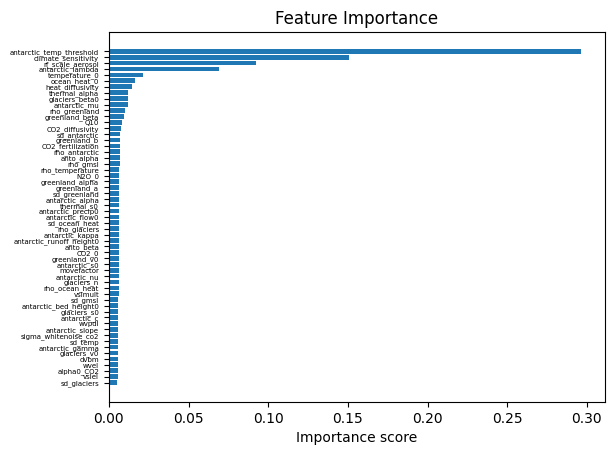

In [40]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 2, 
n_estimators= 120, max_depth=20)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5_ssp2_45 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5_ssp2_45)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5_ssp2_45[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

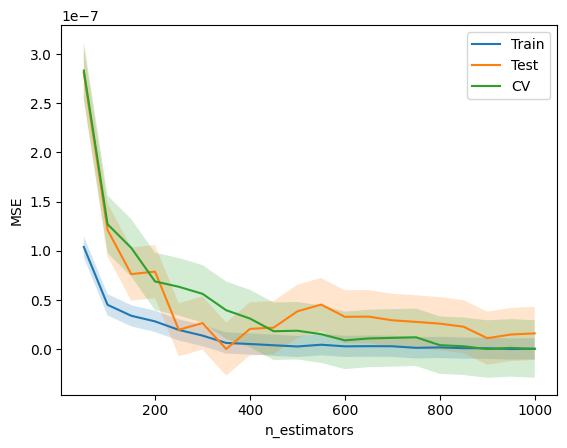

In [41]:
# Define range of n_estimators to test
n_estimators_range = range(50, 1050, 50)

# Get train and test scores for different values of n_estimators
train_scores = []
test_scores = []
cv_scores = []
for n in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_scores.append(np.mean((rf.predict(X_train) - y_train) ** 2))
    test_scores.append(np.mean((rf.predict(X_test) - y_test) ** 2))
    cv_scores_n = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(-1 * cv_scores_n))

train_scores1 = train_scores - np.min(train_scores)
test_scores1 = test_scores - np.min(test_scores)
cv_scores1 = cv_scores - np.min(cv_scores)

# Calculate mean and standard deviation of train, test, and CV scores
mean_train = np.mean(train_scores1)
std_train = np.std(train_scores1, ddof=1)
mean_test = np.mean(test_scores1)
std_test = np.std(test_scores1, ddof=1)
mean_cv = np.mean(cv_scores1)
std_cv = np.std(cv_scores1, ddof=1)

# Calculate 95% confidence intervals for train, test, and CV scores
ci_train = 1.96 * std_train / np.sqrt(len(train_scores1))
ci_test = 1.96 * std_test / np.sqrt(len(test_scores1))
ci_cv = 1.96 * std_cv / np.sqrt(len(cv_scores1))

# Plot train and test scores for different values of n_estimators
plt.plot(n_estimators_range, train_scores1, label='Train')
plt.fill_between(n_estimators_range, train_scores1 - ci_train, train_scores1 + ci_train, alpha=0.2)
plt.plot(n_estimators_range, test_scores1, label='Test')
plt.fill_between(n_estimators_range, test_scores1 - ci_test, test_scores1 + ci_test, alpha=0.2)
plt.plot(n_estimators_range, cv_scores1, label='CV')
plt.fill_between(n_estimators_range, cv_scores1 - ci_cv, cv_scores1 + ci_cv, alpha=0.2)
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend()
plt.show()
    

# SSP4-60

In [42]:
# load the dataset as a pandas dataframe
df = pd.read_csv('Data\projections_NO_OptimalCost_RCP60.csv')

# extract the fifth row as a pandas series
row_5 = df.iloc[4]

# convert the series to a dataframe with a single column
Y = pd.DataFrame(row_5.values, columns=['OptimalCost'])



In [43]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp4-60.csv") 

X = pd.concat([X1, X2], axis=1)

# Extracting Feature names
feature_names = X.columns

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [47]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [81, 90, 100, 105, 115, 120, 131, 145, 156, 170],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [18],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 120}

In [45]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [120],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [18],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 120}

In [46]:
param_grid = { 
            "n_estimators"      : [120],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 120}

MSE for Random Forest on CV train data:  0.0000000415
MSE for Random Forest on test data:  0.0000122600


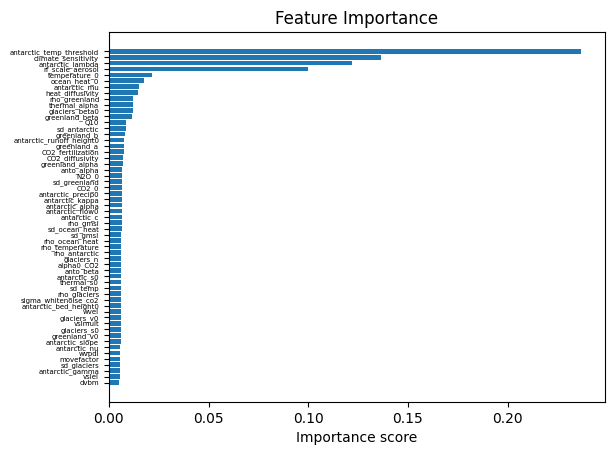

In [48]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 2, 
n_estimators= 120, max_depth=18)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5_ssp4_60 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5_ssp4_60)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5_ssp4_60[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

# SSP5-85

In [49]:
# load the dataset as a pandas dataframe
df = pd.read_csv('Data\projections_NO_OptimalCost_RCP85.csv')

# extract the fifth row as a pandas series
row_5 = df.iloc[4]

# convert the series to a dataframe with a single column
Y = pd.DataFrame(row_5.values, columns=['OptimalCost'])



In [50]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp5-85.csv") 

X = pd.concat([X1, X2], axis=1)

# Extracting Feature names
feature_names = X.columns

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [58]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [131, 145, 156, 170, 185, 200, 215, 222, 235, 250],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [33],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [59]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [200],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [33],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [60]:
param_grid = { 
            "n_estimators"      : [200],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

MSE for Random Forest on CV train data:  0.0000000000
MSE for Random Forest on test data:  0.0000300368


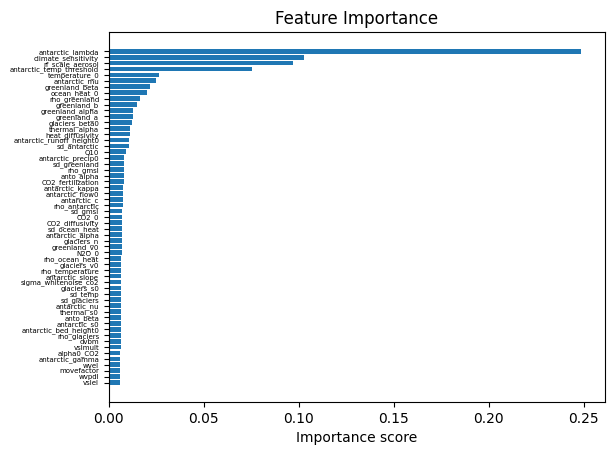

In [61]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 2, 
n_estimators= 200, max_depth=33)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5_ssp5_85 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5_ssp5_85)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5_ssp5_85[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

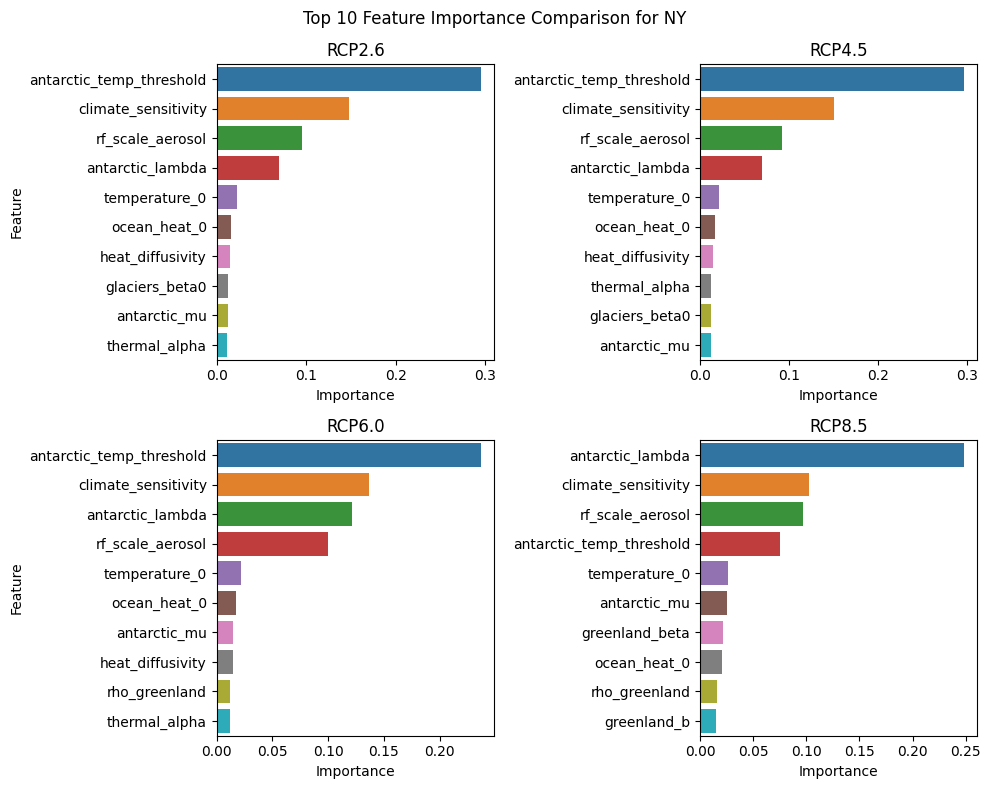

In [62]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plotting top 10 features for RCP2.6
top10_ssp1_26_idx = np.argsort(feature_importance_cv5_ssp1_26)[-10:][::-1]
top10_ssp1_26 = feature_importance_cv5_ssp1_26[top10_ssp1_26_idx]
sns.barplot(x=top10_ssp1_26, y=feature_names[top10_ssp1_26_idx], ax=ax1)
ax1.set_title('RCP2.6')
ax1.set_xlabel('Importance')
ax1.set_ylabel('Feature')

# Plotting top 10 features for RCP4.5
top10_ssp2_45_idx = np.argsort(feature_importance_cv5_ssp2_45)[-10:][::-1]
top10_ssp2_45 = feature_importance_cv5_ssp2_45[top10_ssp2_45_idx]
sns.barplot(x=top10_ssp2_45, y=feature_names[top10_ssp2_45_idx], ax=ax2)
ax2.set_title('RCP4.5')
ax2.set_xlabel('Importance')
ax2.set_ylabel('')

# Plotting top 10 features for RCP6.0
top10_ssp4_60_idx = np.argsort(feature_importance_cv5_ssp4_60)[-10:][::-1]
top10_ssp4_60 = feature_importance_cv5_ssp4_60[top10_ssp4_60_idx]
sns.barplot(x=top10_ssp4_60, y=feature_names[top10_ssp4_60_idx], ax=ax3)
ax3.set_title('RCP6.0')
ax3.set_xlabel('Importance')
ax3.set_ylabel('Feature')

# Plotting top 10 features for RCP8.5
top10_ssp5_85_idx = np.argsort(feature_importance_cv5_ssp5_85)[-10:][::-1]
top10_ssp5_85 = feature_importance_cv5_ssp5_85[top10_ssp5_85_idx]
sns.barplot(x=top10_ssp5_85, y=feature_names[top10_ssp5_85_idx], ax=ax4)
ax4.set_title('RCP8.5')
ax4.set_xlabel('Importance')
ax4.set_ylabel('')

fig.suptitle('Top 10 Feature Importance Comparison for NY')
fig.tight_layout()
plt.show()